<p align=center> <img src='https://www.inail.it/cs/internet/imgs/coronavirus.jpg' width='400'> </p>
<h1 align='center'> COVID19 </h1>
<h1 align='center'> Time Series Forecasting </h1>

## Libraries Import

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import date

import calendar
import holidays


# FBPROPHET by META
import fbprophet
from fbprophet import Prophet

from sklearn.metrics import mean_squared_error


print('Libraries are correctly imported!')

Libraries are correctly imported!


## Plotting Style

In [22]:
plt.style.use("seaborn-whitegrid")
plt.rc('figure',facecolor='white')
plt.rc('axes',facecolor='lightgrey')
plt.rc('figure',autolayout=True)
plt.rc('axes',labelweight='bold',labelsize='large',titleweight='bold',titlesize=13)

<p align=center> <img src='https://www.protezionecivile.gov.it/img/dpc-logo-1200x630.jpg' width='400'> </p>
<p align=center> <img src='https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/assets/img/dpc-covid19-flusso-dati-it.png' width='400'> </p>

<h1 align='center'> Data Analysis </h1>

## Plotting Style

Everyday at 6:00pm the Italy Government publishes on own GitHub account the COVID19 offical data ("https://github.com/pcm-dpc")

In [23]:
# Download of data form github repository of official account "Presidenza del Consiglio dei Ministri - Dipartimento della Protezione Civile"

url='https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
df=pd.read_csv(url)

print('The dataset is correctly loaded!')

The dataset is correctly loaded!


In [24]:
df.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Calculs of total days of COVID19

today=datetime.date.today()
starting_covid=datetime.date(2020,2,24)
covid_days=today-starting_covid
covid_days.days

729

In [26]:
df.tail(2)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
15307,2022-02-21T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,25,4,29,1485,...,NaN,0.0,NaN,NaN,13862.0,17270.0,133946.0,328040.0,ITC,ITC2
15308,2022-02-21T17:00:00,ITA,5,Veneto,45.434905,12.338452,788,55,843,71395,...,Nei valori riportati per le terapie intensive ...,4.0,NaN,NaN,738132.0,565087.0,9232476.0,15986678.0,ITH,ITH3


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15309 entries, 0 to 15308
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    15309 non-null  object 
 1   stato                                   15309 non-null  object 
 2   codice_regione                          15309 non-null  int64  
 3   denominazione_regione                   15309 non-null  object 
 4   lat                                     15309 non-null  float64
 5   long                                    15309 non-null  float64
 6   ricoverati_con_sintomi                  15309 non-null  int64  
 7   terapia_intensiva                       15309 non-null  int64  
 8   totale_ospedalizzati                    15309 non-null  int64  
 9   isolamento_domiciliare                  15309 non-null  int64  
 10  totale_positivi                         15309 non-null  in

We have 29 columns, mainly numerical data (int64)

In [28]:
# We need to correct the 'data' column since it is not useful the presence of hours near date string

df['data']=pd.to_datetime(df['data']).dt.normalize()

In [29]:
df.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-24,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df=df.groupby('data').sum()

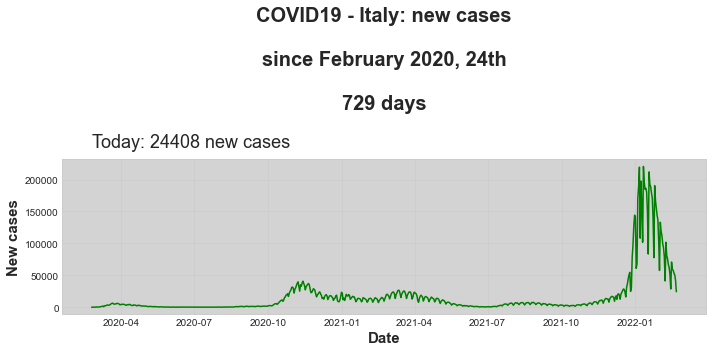

In [31]:
# Plot: situation of COVID19 as of Today since starting

plt.figure(figsize=(10,5))

plt.title('COVID19 - Italy: new cases\n\nsince February 2020, 24th\n\n'+str(covid_days.days)+' days\n\n',fontsize=20)

plt.plot(df['nuovi_positivi'],color='green')

plt.text(df.index[0],np.max(df['nuovi_positivi'])+30000,'Today: {} new cases'.format(df['nuovi_positivi'].iloc[-1]),fontsize=18)

plt.xlabel('Date',fontsize=15)
plt.ylabel('New cases',fontsize=15)

plt.show()

This is the situation: after a very high peak caused by Christmas holidays, now we lucky have a decrease.

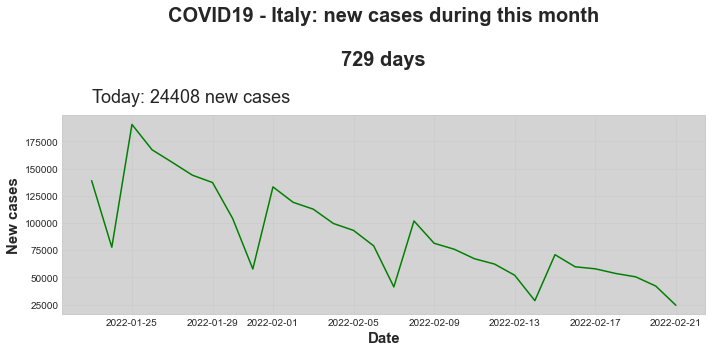

In [32]:
# Plot: situation of COVID19 as of Today during this month

plt.figure(figsize=(10,5))

plt.title('COVID19 - Italy: new cases during this month\n\n'+str(covid_days.days)+' days\n\n', fontsize=20)

plt.plot(df[-30:].index, df[-30:].nuovi_positivi, color='green')

plt.text(df[-30:].index[0],np.max(df[-30:]['nuovi_positivi'])+20000,'Today: {} new cases'.format(df['nuovi_positivi'].iloc[-1]),fontsize=18)

plt.xlabel('Date',fontsize=15)
plt.ylabel('New cases',fontsize=15)

plt.show()

<h1 align='center'> Time Series Forecasting</h1>
<br> </br>
<p align=center> <img src='https://miro.medium.com/max/964/0*tVCene42rgUTNv9Q.png' width='200'> </p>
<h1 align='center'> PROPHET algorithm by META</h1>
<p align=center> <img src='https://upload.wikimedia.org/wikipedia/commons/e/e4/Meta_Inc._logo.jpg' width='200'> </p>
<br> </br>

Prophet is a procedure made by META for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In order to correctly use this algorithm we must follow this META page: https://facebook.github.io/prophet/docs/quick_start.html#python-api
<br> </br>
For this algorithm it is necessary to use a new-copied dataframe compoused by only 2 columns:
- ds --> for dates in pandas format YYYY-MM-DD
- y ---> for time series values that need to be predicted

## Data frame of the model

In [33]:
dfProphet=df['nuovi_positivi'].reset_index()
dfProphet=dfProphet.rename(columns={'data':'ds','nuovi_positivi':'y'})
dfProphet

,ds,y
0,2020-02-24,221
1,2020-02-25,93
2,2020-02-26,78
3,2020-02-27,250
4,2020-02-28,238
...,...,...
724,2022-02-17,57890
725,2022-02-18,53662
726,2022-02-19,50534
727,2022-02-20,42081


## Model fitting

In [34]:
# We fit the model by instantiating a new Prophet object
# Any settings to the forecasting procedure are passed into the constructor

model=Prophet(n_changepoints=50,changepoint_prior_scale=10,seasonality_mode='multiplicative')

# We have to create a new dataframe that extends into the future a specified number of days for the predictions
# By default this new dataframe includes the dates from the history
# We can add HOLIDAYS according to a specific country

model.add_country_holidays(country_name='Italy')

# We cann add different kind of SEASONALITY + we need to specify the FOURIER ORDER
# The increase of the number of FOURIER ORDER allows the seasonality to fit faster changing cycles
# but can also lead to overfitting: N Fourier terms corresponds to 2N variables used for modeling the cycle

model.add_seasonality('weekly',period=7,fourier_order=5)
model.add_seasonality('monthly',period=28,fourier_order=12)
model.add_seasonality('yearly',period=365,fourier_order=25)

# Then we call fit method

model.fit(dfProphet)

# Interval definition

timeSeriesDays=28

forecastDays=7

totalDays=timeSeriesDays+forecastDays

future=model.make_future_dataframe(periods=forecastDays)

# The predict method will assign each row in future a predicted value called YHAT.
# We create a new OBJECT dataframe called "forecast" that includes different new columns.
# Three columns are the most important:
#   1- yhat (predicted value)
# and 2 other columns that represents the interval:
#   2- yhat_lower
#   3- yhat_upper

forecast=model.predict(future)

print('Model fitting completed!')

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -9.80359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2009.92      0.021274       1151.68       0.768       0.768      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2140.53     0.0035049       1080.08           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2182.4     0.0108171       357.866           1           1      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2203.85     0.0092364       228.549      0.9716      0.9716      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2220.07    0.00315739        642.39      0.5084      0.5084      615   
    Iter      log prob        ||dx||      ||grad||       alpha  

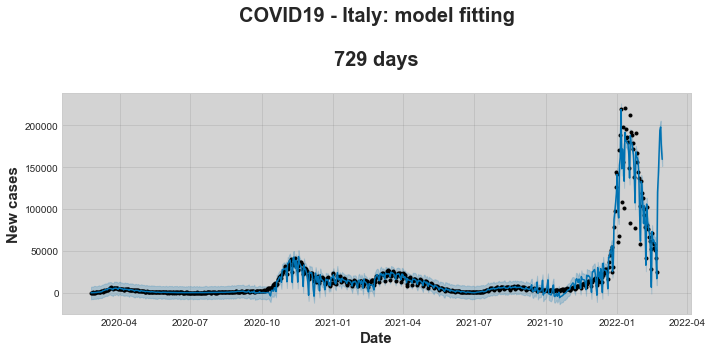

In [35]:
# We can plot values by using Prophet.plot method with our dataframe called "forecast"

model.plot(forecast,figsize=(10,5))

plt.title('COVID19 - Italy: model fitting\n\n'+str(covid_days.days)+' days\n',fontsize=20)

plt.xlabel('Date',fontsize=15)
plt.ylabel('New cases',fontsize=15)

plt.show()

In [42]:
forecastDF=forecast[['ds','yhat','yhat_lower','yhat_upper']]
forecastDF

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-24,-20.896226,-7979.144769,7149.390888
1,2020-02-25,-38.625458,-7555.604388,7416.887682
2,2020-02-26,9.041902,-7677.711210,7084.468572
3,2020-02-27,72.625732,-7464.598059,7572.506043
4,2020-02-28,151.066685,-7256.420480,8165.741152
...,...,...,...,...
731,2022-02-24,167571.820651,160293.709482,174665.110597
732,2022-02-25,193961.690889,186592.134554,201626.194752
733,2022-02-26,198035.620360,190269.325986,205687.188440
734,2022-02-27,171899.210492,164540.620123,179745.227244


In [37]:
# We need to shift "today" to yesterday since the uploaded is made by Italian Government on GitHub every evening on 6:00pm
# This is not a good constraints, therefore we can shift to yesterday

real_today=(datetime.date.today())
print('Real today is: ' + str(real_today))

today=(datetime.date.today())-datetime.timedelta(days=1)
print('Unreal today is: ' + str(today))

tomorrow=today+datetime.timedelta(days=1)
print('Unreal tomorrow is: ' + str(tomorrow))

Real today is: 2022-02-22
Unreal today is: 2022-02-21
Unreal tomorrow is: 2022-02-22


## Final chart

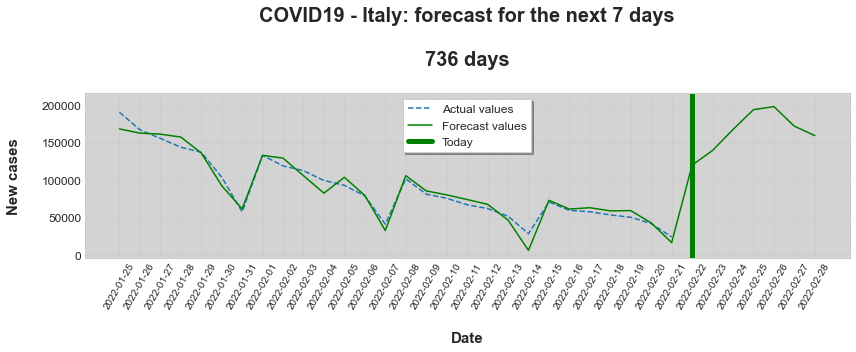

In [47]:
plt.figure(figsize=(12,5))

plt.title('COVID19 - Italy: forecast for the next 7 days\n\n'+str(covid_days.days+forecastDays)+' days\n',fontsize=20)

#--------------#

# ACTUAL VALUES

plt.plot(df[-timeSeriesDays:].index,df[-timeSeriesDays:]['nuovi_positivi'],label='Actual values',linestyle='--')

# FORECAST VALUES - PREDICTIONS

plt.plot(forecastDF[-totalDays:]['ds'],forecastDF[-totalDays:]['yhat'],color='green',label='Forecast values')

plt.fill_between(forecastDF[-forecastDays:]['ds'],forecastDF[-forecastDays:]['yhat_lower'],forecastDF[-forecastDays:]['yhat_upper'],color='lightgrey')

#--------------#

plt.axvline(real_today, color='green',label='Today',linewidth='5')

plt.legend(loc='upper center',fontsize=12,fancybox=False,shadow=True,frameon=True,facecolor='white')

plt.xlabel('\nDate',fontsize=15)
plt.ylabel('New cases\n',fontsize=15)

plt.xticks(forecastDF[-timeSeriesDays-forecastDays:]['ds'],rotation=60,fontsize=10)
plt.yticks(fontsize=12)

plt.show()

## Performance analysis

In [69]:
# The final stage is related to the calcusus of 2 parameters:
# - MAPE (Mean Absolute Percentage Error): is measure of prediction accuracy of a forecasting model
# - RMSE (Root-mean-square deviation): is a measure of the differences between values predicted by a model and the real values observed

# Support function needed for MAPE (Mean Absolute Percentage Error)

def mape(ActualValues,PredictedValues):
    ActualValues,PredictedValues=np.array(ActualValues),np.array(PredictedValues)
    return np.mean(np.abs((ActualValues-PredictedValues)/ActualValues))*100

MAPE=mape(forecastDF[-timeSeriesDays-forecastDays:-timeSeriesDays]['yhat'],dfProphet[-forecastDays:]['y'])

RMSE=mean_squared_error(forecastDF[-timeSeriesDays-forecastDays:-timeSeriesDays]['yhat'],dfProphet[-forecastDays:]['y'],squared=False)

print('MAPE: {:.0f} %'.format(MAPE))
print('RMSE: {:.0f} Cases'.format(RMSE))

MAPE: 61 %
RMSE: 86918 Cases


### The model should be upgraded in order to decrease the MAPE value

## Final results

Prophet procedure by META shows that for the next 7 days COVID19 in Italy will decrease in these ways:
- a first increase for 3 days
- a final decrease during the last 4 days